# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("../data/nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [52]:
# relabel colum
da['DMDMARTLx'] = da['DMDMARTL'].replace({1:'Married', 2:'Widowed', 3:'Divorced', 4:'Separated', 5:'Never married', 6:'Living with partner', 77:'Refused', 99:'Unknown' }).fillna('Missing')
da['RIAGENDRx'] = da['RIAGENDR'].replace({1:'Male', 2:'Female'})

#create freq table
x = da['DMDMARTLx'].value_counts()
x / x.sum()*100

Married                48.474281
Never married          17.506539
Divorced               10.095902
Living with partner     9.189189
Widowed                 6.904969
Missing                 4.551003
Separated               3.243243
Refused                 0.034874
Name: DMDMARTLx, dtype: float64

In [21]:
#freq table for women only
x = da[da['RIAGENDR']==2]['DMDMARTLx'].value_counts()
x / x.sum()*100

Married                43.783602
Never married          17.473118
Divorced               11.760753
Widowed                 9.946237
Living with partner     8.803763
Missing                 4.233871
Separated               3.965054
Refused                 0.033602
Name: DMDMARTLx, dtype: float64

In [22]:
#freq table for male only
x = da[da['RIAGENDR']==1]['DMDMARTLx'].value_counts()
x / x.sum()*100

Married                53.533889
Never married          17.542588
Living with partner     9.604929
Divorced                8.300109
Missing                 4.893077
Widowed                 3.624502
Separated               2.464661
Refused                 0.036245
Name: DMDMARTLx, dtype: float64

In [23]:
#freq table for all people, age 30-40
age30_40 = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]
x = age30_40['DMDMARTLx'].value_counts()
x / x.sum()*100

Married                54.580897
Never married          21.150097
Living with partner    13.937622
Divorced                6.822612
Separated               2.923977
Widowed                 0.487329
Refused                 0.097466
Name: DMDMARTLx, dtype: float64

In [24]:
#freq table for females, age 30-40
x = age30_40[age30_40['RIAGENDR']==2]['DMDMARTLx'].value_counts()
x / x.sum()*100

Married                53.571429
Never married          21.804511
Living with partner    12.218045
Divorced                8.646617
Separated               3.383459
Widowed                 0.375940
Name: DMDMARTLx, dtype: float64

In [25]:
#freq table for males, age 30-40
x = age30_40[age30_40['RIAGENDR']==1]['DMDMARTLx'].value_counts()
x / x.sum()*100

Married                55.668016
Never married          20.445344
Living with partner    15.789474
Divorced                4.858300
Separated               2.429150
Widowed                 0.607287
Refused                 0.202429
Name: DMDMARTLx, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [44]:
#subset df
females = da[da['RIAGENDR'] == 2].copy()

#stratify
females['agegr'] = pd.cut(females['RIDAGEYR'], [18, 30, 40, 50, 60, 70, 80])

#group data
df =females.groupby("agegr")["DMDMARTLx"].value_counts().unstack().fillna(0)

#normalize
df = df.apply(lambda x : x/x.sum() * 100, axis = 1)

df

DMDMARTLx,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
agegr,,,,,,,,
"(18, 30]",1.806240,18.719212,25.944171,9.195402,42.528736,0.000000,1.806240,0.000000
"(30, 40]",9.071730,12.025316,54.430380,0.000000,20.464135,0.000000,3.586498,0.421941
"(40, 50]",13.745020,7.370518,57.370518,0.000000,12.549801,0.000000,6.573705,2.390438
"(50, 60]",17.659574,6.808511,54.680851,0.000000,8.936170,0.212766,5.744681,5.957447
"(60, 70]",19.274376,4.308390,48.072562,0.000000,8.616780,0.000000,4.988662,14.739229
"(70, 80]",14.390244,0.731707,31.707317,0.000000,5.121951,0.000000,1.951220,46.097561


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [45]:
#subset df
males = da[da['RIAGENDR'] == 1].copy()

#stratify
males['agegr'] = pd.cut(males['RIDAGEYR'], [18, 30, 40, 50, 60, 70, 80])

#group data
df =males.groupby("agegr")["DMDMARTLx"].value_counts().unstack().fillna(0)

#normalize
df = df.apply(lambda x : x/x.sum() * 100, axis = 1)

df

DMDMARTLx,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
agegr,,,,,,,,
"(18, 30]",0.367647,17.463235,19.117647,13.235294,48.161765,0.000000,1.286765,0.367647
"(30, 40]",5.240175,15.720524,56.331878,0.000000,19.432314,0.218341,2.620087,0.436681
"(40, 50]",8.478803,8.229426,70.324190,0.000000,9.725686,0.000000,2.743142,0.498753
"(50, 60]",12.555066,7.488987,65.198238,0.000000,10.352423,0.000000,2.202643,2.202643
"(60, 70]",12.585812,5.034325,66.590389,0.000000,8.695652,0.000000,3.203661,3.890160
"(70, 80]",14.179104,2.238806,61.194030,0.000000,2.238806,0.000000,3.482587,16.666667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

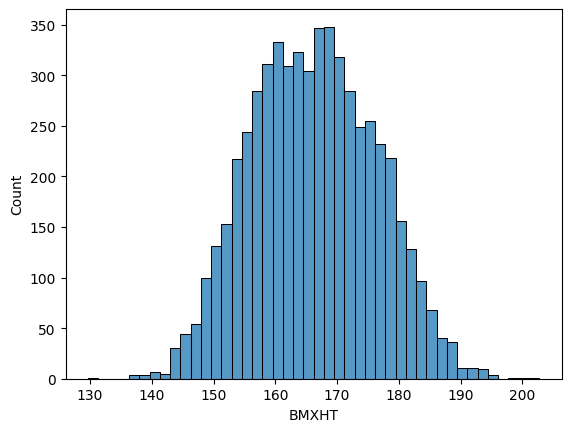

In [47]:
sns.histplot(da.BMXHT)
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

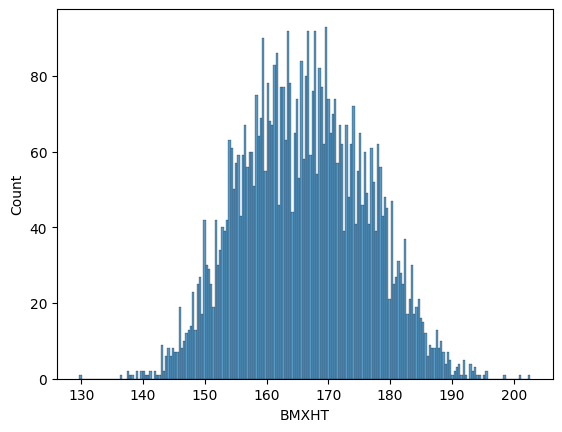

In [49]:
sns.histplot(da.BMXHT, bins = 200)
plt.show()

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

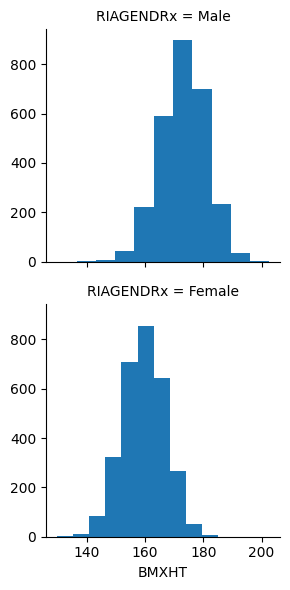

In [54]:
g = sns.FacetGrid(da, row = 'RIAGENDRx')
g = g.map(plt.hist, "BMXHT")
plt.show()

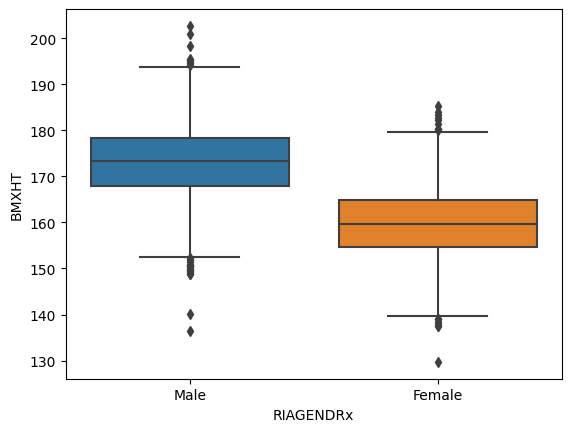

In [56]:
sns.boxplot(y = da['BMXHT'], x = da['RIAGENDRx'])
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

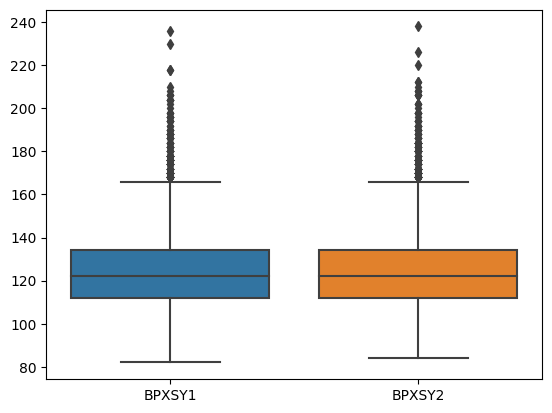

In [64]:
sns.boxplot(da[['BPXSY1', 'BPXSY2']])
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [ ]:
# insert your code here

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

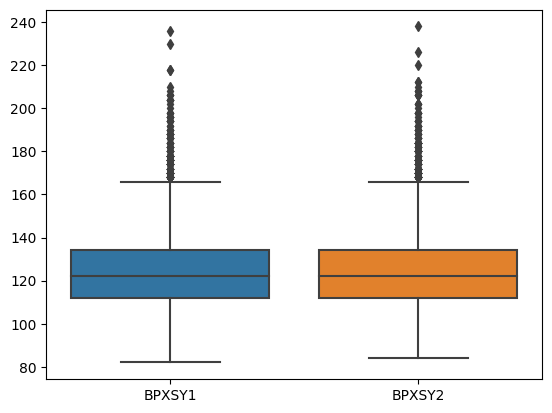

In [65]:
sns.boxplot(da[['BPXSY1', 'BPXSY2']])
plt.show()

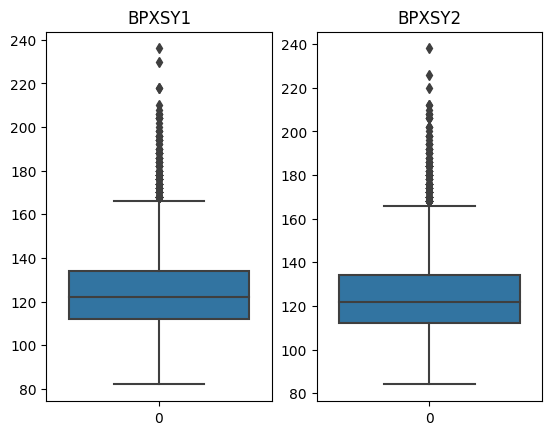

In [63]:
fig, ax =plt.subplots(1,2)
sns.boxplot(da['BPXSY1'], ax = ax[0]).set_title("BPXSY1")
sns.boxplot(da['BPXSY2'], ax = ax[1]).set_title("BPXSY2")
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [67]:
dx = da.groupby(["DMDEDUC2"])["DMDHHSIZ"].value_counts().unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
dx
#print(dx.to_string(float_format="%.2f")) 

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
2.0,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
3.0,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
4.0,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034
5.0,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
9.0,NaN,0.666667,NaN,NaN,0.333333,NaN,NaN


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [68]:
da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)].groupby(["DMDEDUC2", "RIAGENDR"])["DMDHHSIZ"].median()


DMDEDUC2  RIAGENDR
1.0       1           5.0
          2           5.0
2.0       1           4.5
          2           5.0
3.0       1           4.0
          2           5.0
4.0       1           4.0
          2           4.0
5.0       1           3.0
          2           3.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [72]:
da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDR']) \
    [['RIDAGEYR', 'BMXHT', 'BMXBMI']] \
    .mean().unstack()

RIDAGEYR                  BMXHT                 BMXBMI  \
RIAGENDR                  1          2           1           2          1   
SDMVSTRA SDMVPSU                                                            
119      1        47.861111  47.663265  172.741667  159.570408  26.958333   
         2        54.363636  52.987952  172.906818  159.244578  27.160465   
120      1        43.130000  43.636364  169.537755  155.402041  30.939175   
         2        45.219178  43.736111  173.075342  159.218056  27.727397   
121      1        46.750000  44.397959  172.177885  158.871579  29.416505   
         2        42.063158  44.376344  174.764516  160.229032  26.273118   
122      1        44.653061  42.897436  173.998969  161.315385  28.528866   
         2        44.320000  47.333333  170.332323  157.231111  25.744444   
123      1        47.829787  44.841121  174.315217  162.059615  29.231522   
         2        52.126582  46.457447  174.454430  160.476596  28.811392   
124      1        50.750000  51.664000  172.109009  158.788710  28.614414   
         2        48.245614  42.541667  174.291228  162.853521  27.714035   
125      1        55.165289  50.900901  173.631092  160.762385  29.727731   
         2        49.705882  51.660000  174.456863  160.021429  29.143564   
126      1        48.416667  46.229167  175.149398  160.387500  29.033333   
         2        48.666667  47.205882  174.713043  160.892000  29.039130   
127      1        53.137931  49.694444  171.545349  157.422430  31.062353   
         2        54.070588  51.486239  173.366667  159.022936  30.557831   
128      1        53.673267  55.638462  169.325000  156.339063  31.749000   
         2        45.822785  45.589744  172.400000  160.437179  26.835443   
129      1        43.922222  45.329787  171.094318  156.900000  26.493182   
         2        45.775510  43.500000  173.138298  161.034259  28.961702   
130      1        50.516854  47.810526  176.974157  161.977895  30.337079   
         2        50.535354  50.833333  175.061224  160.060577  29.237755   
131      1        53.140187  54.893617  175.610476  161.989362  28.259615   
         2        46.778846  45.000000  175.091346  161.673810  30.077885   
132      1        42.380435  43.210526  172.534066  161.508421  28.546154   
         2        49.038760  51.700000  172.809524  159.138281  28.966667   
133      1        44.054795  45.105882  171.509722  158.295122  27.495833   
         2        47.489796  47.063158  171.179167  158.627368  27.966667   

                             
RIAGENDR                  2  
SDMVSTRA SDMVPSU             
119      1        30.052041  
         2        27.849398  
120      1        32.419388  
         2        27.400000  
121      1        30.856842  
         2        26.470968  
122      1        29.447436  
         2        26.611111  
123      1        29.905769  
         2        30.641489  
124      1        29.533065  
         2        28.640845  
125      1        30.385321  
         2        28.564286  
126      1        31.262500  
         2        29.612121  
127      1        32.189720  
         2        30.770642  
128      1        32.303125  
         2        27.491026  
129      1        29.019149  
         2        29.429630  
130      1        30.700000  
         2        31.490385  
131      1        30.061702  
         2        32.984127  
132      1        29.848421  
         2        30.540625  
133      1        27.959259  
         2        29.000000

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.